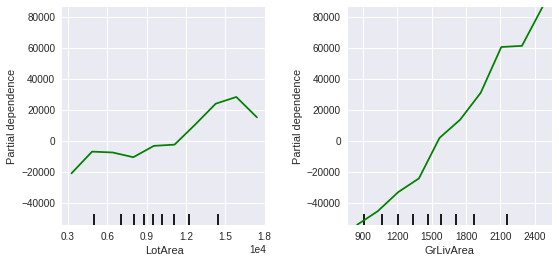

In [3]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble.partial_dependence import plot_partial_dependence


def get_some_data():
    cols_to_use = ['LotArea', 'YearBuilt', 'GrLivArea']
    data = pd.read_csv('train.csv')
    y = data.SalePrice
    X = data[cols_to_use]
    my_imputer = SimpleImputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

# get_some_data is defined in hidden cell above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['LotArea', 'YearBuilt', 'GrLivArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis
